In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot
plt.rcParams['figure.figsize'] = 8, 4 # set default size of plots
plt.rcParams.update({'font.size': 18})

import scraping_class
logfile = 'log.txt' ## name your log file.
connector = scraping_class.Connector(logfile)

from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

In [180]:
#pip install cpi

In [181]:
movies = pd.read_csv('IMDb movies.csv')
actors = pd.read_csv('IMDb names.csv')
ratings = pd.read_csv('IMDb ratings.csv')
role = pd.read_csv('IMDb title_principals.csv')

In [182]:
# IMDb - Remove duplicates and all years before 1990

movies_90 = movies[movies.year >= 1990] # (53368, 22)
#movies_90 = movies.drop(movies[movies['year'] < 1990].index)
movies_us = movies[movies.country == 'USA']
movies_us_90 = movies_us[movies_us.year >= 1990]
movies_90['title'] = movies_90['title'].astype(str)
movies_90 = movies_90.drop_duplicates(subset = 'title')
mocies_us_90 = movies_us_90.drop_duplicates(subset = 'title')

/Users/ea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [183]:
# RT - Remove duplicates 
df_RT = pd.read_csv('RT.csv').drop_duplicates(subset = 'title')
df_90 = pd.merge(movies_90,df_RT,how='inner',on='title')
df_90 = df_90.drop_duplicates()
df_90_us = pd.merge(movies_us_90,df_RT,how='inner',on='title')
df_90_us = df_90_us.drop_duplicates()

In [184]:
# **** Remove NaN ****
df_90_income = df_90.dropna(subset = ['worlwide_gross_income']).reset_index(drop=True).drop_duplicates()
df_us = df_90_us[df_90_us['worlwide_gross_income'].notna()].reset_index(drop=True)

#df_90_income.dtypes
#df_90_income.head()
#print(df_90_income.shape)
#df_90
df_90_income

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,tomatometer_score,audience_score
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.4,75298,$ 48000000,$ 47121859,$ 76019048,44.0,330.0,127.0,50%,62%
1,tt0098994,"After Dark, My Sweet","After Dark, My Sweet",1990,1990-08-24,"Crime, Drama, Mystery",114,USA,English,James Foley,...,6.6,3019,NaN,$ 2678414,$ 2678414,78.0,46.0,28.0,82%,61%
2,tt0099005,Air America,Air America,1990,1991-02-22,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,...,5.8,25683,$ 35000000,$ 31053601,$ 33461269,33.0,49.0,28.0,13%,34%
3,tt0099012,Alice,Alice,1990,1991-01-10,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,...,6.6,12574,$ 12000000,$ 7331647,$ 7331647,67.0,65.0,59.0,75%,57%
4,tt0099018,Almost an Angel,Almost an Angel,1990,1990-12-27,"Comedy, Drama",95,USA,English,John Cornell,...,5.5,3760,$ 25000000,$ 6939946,$ 6939946,NaN,26.0,10.0,29%,48%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,tt9109306,The Final Wish,The Final Wish,2018,2019-01-24,Horror,95,USA,English,Timothy Woodward Jr.,...,4.2,2342,NaN,$ 25183,$ 82959,NaN,78.0,18.0,73%,26%
7246,tt9206798,All Is True,All Is True,2018,2019-02-08,"Biography, Drama, History",101,UK,English,Kenneth Branagh,...,6.1,1956,NaN,$ 1200481,$ 3019143,59.0,62.0,64.0,72%,67%
7247,tt9352926,The Sound of Silence,The Sound of Silence,2019,2019-09-13,Drama,85,USA,English,Michael Tyburski,...,5.3,426,NaN,$ 20013,$ 21994,66.0,14.0,15.0,65%,Nan
7248,tt9354944,Jexi,Jexi,2019,2019-10-11,Comedy,84,USA,English,"Jon Lucas, Scott Moore",...,6.6,3674,$ 5000000,$ 6546159,$ 7257918,39.0,46.0,24.0,17%,71%


In [185]:
# CPI inflation 
import cpi
#cpi.update()

def inflate_column(data, column):
    '''Inflate monetary figures from a given year to their 2018 values'''
    return data.apply(lambda x: cpi.inflate(x[column], x.year), axis=1)

In [186]:

df_90_income['worldwide_gross_income'] = df_90_income['worlwide_gross_income']\
                                        .apply(lambda x:x[1:] if x and x[:1]== '$' else None)
df_90_income = df_90_income.drop('worlwide_gross_income', axis=1)
df_90_income = df_90_income.dropna(subset = ['worldwide_gross_income'])

In [187]:
df_90_income = df_90_income.dropna(subset = ['budget'])
df_90_income['budget'] = df_90_income['budget'].apply(lambda x:x[1:] if x and x[:1]== '$' else None)


df_90_income = df_90_income.dropna(subset = ['usa_gross_income'])
df_90_income['usa_gross_income'] = df_90_income['usa_gross_income']\
                                        .apply(lambda x:x[1:] if x and x[:1]== '$' else None)

In [188]:
df_90_income = df_90_income.reset_index(drop=True).drop_duplicates()

df_90_income.worldwide_gross_income = df_90_income.worldwide_gross_income.astype(int)
df_90_income = df_90_income[df_90_income.year <= 2018]
df_90_income['adjusted_wgi'] = inflate_column(df_90_income, 'worldwide_gross_income')

df_budget = df_90_income.dropna(subset = ['budget']).copy()
df_budget.budget = df_budget.budget.astype(int)

df_budget['adjusted_budget'] = inflate_column(df_budget, 'budget')
df_budget['net_income'] = df_budget.adjusted_wgi - df_budget.adjusted_budget
df_90_income.dtypes
#df_budget

imdb_title_id              object
title                      object
original_title             object
year                        int64
date_published             object
genre                      object
duration                    int64
country                    object
language                   object
director                   object
writer                     object
production_company         object
actors                     object
description                object
avg_vote                  float64
votes                       int64
budget                     object
usa_gross_income           object
metascore                 float64
reviews_from_users        float64
reviews_from_critics      float64
tomatometer_score          object
audience_score             object
worldwide_gross_income      int64
adjusted_wgi              float64
dtype: object

In [189]:
# df_90 datasæt har også andre valuta som vi ikke har slettet. Derfor er hele kolonnen ikke samme type.
# Prøver på us datasæt i stedet
df_us['wgi'] = df_us['worlwide_gross_income'].replace({'\$':''}, regex = True)
df_us['budget'] = df_us['budget'].replace({'\$':''}, regex = True)
df_us['usa_gross_income'] = df_us['usa_gross_income'].replace({'\$':''}, regex = True)



In [190]:
#len(df_us[df_us.year==2019])
df_us.wgi = df_us.wgi.astype(int)
df_us = df_us[df_us.year <= 2018]
df_us['adjusted'] = inflate_column(df_us, 'wgi')
#df_us

##### EA Edits

##### Data seperated into features to have greater flexibility for project

In [191]:
df_x = df_90_income[['title', 'year', 'date_published', 'genre', 'duration','country', 'director', 'actors', 'budget']]
df_y = df_90_income[[ 'avg_vote', 'metascore','tomatometer_score', 'audience_score','usa_gross_income', 'worldwide_gross_income']]

In [192]:
df_x.to_csv('inputInfo_X.csv', encoding='utf-8',index=False)

In [193]:
df_y.to_csv('inputInfo_Y.csv', encoding='utf-8',index=False)

In [194]:
x = pd.read_csv("inputInfo_X.csv")

In [195]:
y = pd.read_csv("inputInfo_Y.csv")

In [196]:
def convert_to_array(rating):
    rating = str(rating)
    rating = rating.lower()
    rating = rating.split(",")
    return rating

In [197]:
def check_existence(value,attribute):
    for i in value:
        if i in attribute:
            return True
        else:
            return False

##### Convert columns with multiple string entries to a list. This will assist for converting each string entry to dummy variables

In [198]:
x["genre"]= x["genre"].apply(lambda x: convert_to_array(x))
x["country"] = x["country"].apply(lambda x: convert_to_array(x))
x["director"] = x["director"].apply(lambda x: convert_to_array(x))
x["actors"] = x["actors"].apply(lambda x: convert_to_array(x))
x["title"] = x["title"].apply(lambda x: convert_to_array(x))

##### Convert published date to months

In [199]:
x["date_published"] = x["date_published"].apply(lambda x: pd.to_datetime(x).month)

##### Creating dummy variables 

In [200]:
from sklearn.preprocessing import MultiLabelBinarizer
MLB = MultiLabelBinarizer()

In [201]:
actor_dummy = pd.DataFrame(MLB.fit_transform(x["actors"]),columns = MLB.classes_,index=x.index)
genre_dummy = pd.DataFrame(MLB.fit_transform(x["genre"]),columns=MLB.classes_, index=x.index)
country_dummy = pd.DataFrame(MLB.fit_transform(x["country"]),columns = MLB.classes_,index=x.index)
director_dummy = pd.DataFrame(MLB.fit_transform(x["director"]),columns = MLB.classes_,index=x.index)

##### Looking at the predictor values

In [206]:
y_2 = y[["tomatometer_score","audience_score","metascore","avg_vote","usa_gross_income","worldwide_gross_income"]]

##### Clean ratings >> Remove % from score

In [210]:
y_2['tomatometer_score'] = y_2['tomatometer_score'].replace({'\%':''}, regex = True)
y_2['audience_score'] = y_2['audience_score'].replace({'\%':''}, regex = True)


##### ** Change ratings to float ** see error / to do

In [236]:
y_2['tomatometer_score']= y_2['tomatometer_score'].astype(int)
#y_2['audience_score']= y_2['audience_score'].astype(int)

#y_2.info()

##### Converting the audience and user rating to binary. 

In [239]:
y_2["t_rating"] = y_2["tomatometer_score"].apply(lambda x: 1 if x > 60.0 else 0)
#y_2["audience_score"] = y_2["audience_score"].apply(lambda x: 1 if x > 60.0 else 0) # need to change to float

In [14]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

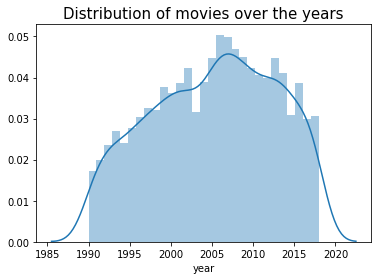

In [15]:
fig, ax = plt.subplots(figsize = (6,4))
sns.distplot(df_90_income.year, bins = 29);
plt.title("Distribution of movies over the years", size = 15);

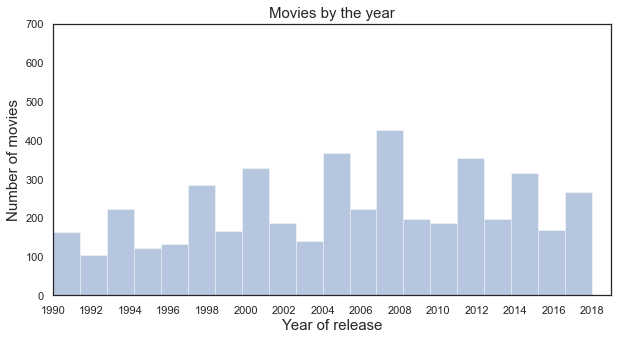

In [16]:
sns.set(style="white")

plt.figure(figsize=(10,5))
plt.title('Movies by the year', size=15)
sns.distplot(df_90_income.year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1990, 2019, 0, 700])
plt.xticks(np.arange(1990, 2019, step=2))
plt.show()

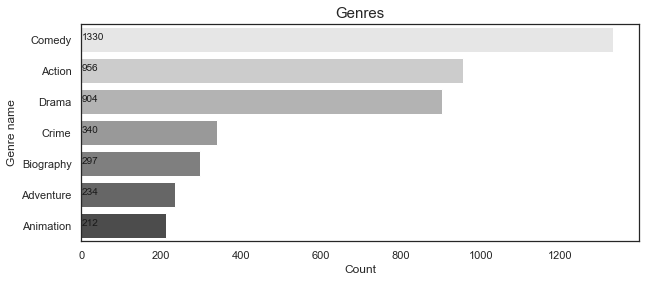

In [17]:
# Overview of the different genres 
df_90_income['first_genre'] = df_90_income['genre'].str.split(',').str[0]

a = plt.cm.binary

plt.figure(figsize=(10,4))
count = df_90_income['first_genre'].value_counts()[:7]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Genres", fontsize=15)
plt.show()

In [18]:
# Overview of movies with highest scores 
top_scored = df_90_income.sort_values(["tomatometer_score","audience_score","metascore","avg_vote"], ascending=False)[
    ["title", "director", "tomatometer_score","audience_score","metascore","avg_vote"]]
top_scored.index = range(len(df_90_income))
top_scored.head(n=10)

,title,director,tomatometer_score,audience_score,metascore,avg_vote
0,L.A. Confidential,Curtis Hanson,99%,94%,90.0,8.2
1,How to Train Your Dragon,"Dean DeBlois, Chris Sanders",99%,91%,74.0,8.1
2,Finding Nemo,"Andrew Stanton, Lee Unkrich",99%,86%,90.0,8.1
3,Selma,Ava DuVernay,99%,86%,88.0,7.5
4,Eighth Grade,Bo Burnham,99%,83%,89.0,7.4
5,Shaun the Sheep Movie,"Mark Burton, Richard Starzak",99%,81%,81.0,7.3
6,Lady Bird,Greta Gerwig,99%,79%,94.0,7.4
7,Le Havre,Aki Kaurismäki,99%,75%,82.0,7.2
8,Zootopia,"Byron Howard, Rich Moore",98%,92%,78.0,8.0
9,Up,"Pete Docter, Bob Peterson",98%,90%,88.0,8.2


In [19]:
test = df_90_income.sort_values(["year"], ascending=False)[
    ["year","tomatometer_score","audience_score","metascore","avg_vote"]]
test.index = range(len(df_90_income))
#test.head(n=10)


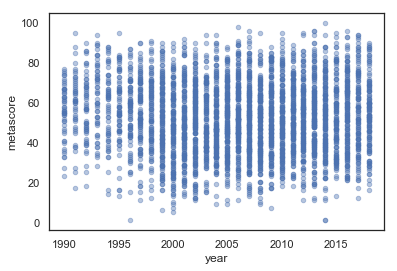

In [20]:
test.plot(kind="scatter",
                      x="year",
                      y="metascore",
                      alpha=0.4)

plt.show()

In [21]:
#fig, ax = plt.subplots(figsize = (9,5))
#sns.distplot(df_90_income.tomatometer_score,bins = 50);
#plt.title("Distribution of metascore among movies", size = 10);


# Error: ould not convert string to float: '50%'
#df_90_income = df_90_income[(df_90_income.tomatometer_score.notnull()) &
#                      (df_90_income.audience_score.notnull())]
#sns.jointplot(x=df_90_income['year'], y=df_90_income['tomatometer_score'],
#              kind="kde").fig.set_size_inches(15,15)

# Works but not pretty 
#plt.figure(figsize=[30,10])
#sns.barplot(x=df_90_income.year, y=df_90_income.metascore, data=df_90_income)

In [22]:
# Ideas:
#1) Look at gender or race in director (men vs women) (balck vs white)

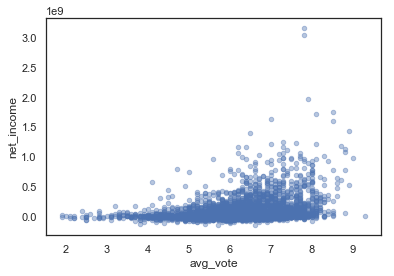

In [23]:
df_budget.plot(kind="scatter",
                      x="avg_vote",
                      y="net_income",
                      alpha=0.4)